In [5]:
import pandas as pd

ModuleNotFoundError: No module named 'pandas'

Loding dataset


In [ ]:
train= pd.read_csv("train.csv/train.csv")
test=pd.read_csv("test.csv/test.csv")
features=pd.read_csv("features.csv")
stores=pd.read_csv("stores.csv")

Quicklook

In [ ]:
print("train:",train.shape)
print("test:",test.shape)
print("features:", features.shape)
print("stores:", stores.shape)

train: (421570, 5)
test: (115064, 4)
features: (8190, 12)
stores: (45, 3)


Lets see the head of each file


In [ ]:
print("train:",train.head())
print("test:",test.head())
print("features:", features.head())
print("stores:", stores.head())

train:    Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False
test:    Store  Dept        Date  IsHoliday
0      1     1  2012-11-02      False
1      1     1  2012-11-09      False
2      1     1  2012-11-16      False
3      1     1  2012-11-23       True
4      1     1  2012-11-30      False
features:    Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDow

Checking the missing values


In [ ]:
print("\nMissing values in Train:\n", train.isnull().sum())
print("\nMissing values in Features:\n", features.isnull().sum())


Missing values in Train:
 Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

Missing values in Features:
 Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64


Checking Datatype so to change some datatype like date is object type to datetime type so to extrat the month date and year separately


In [ ]:
print("train:",train.dtypes)
print("test:",test.dtypes)
print("features:", features.dtypes)
print("stores:", stores.dtypes)

train: Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object
test: Store         int64
Dept          int64
Date         object
IsHoliday      bool
dtype: object
features: Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object
stores: Store     int64
Type     object
Size      int64
dtype: object


Changing object type to datetime type 


In [ ]:
train['Date']=pd.to_datetime(train['Date'])
test['Date']=pd.to_datetime(test['Date'])
features['Date']= pd.to_datetime(features['Date'])

In [ ]:
print("train:",train.dtypes)
print("test:",test.dtypes)
print("features:", features.dtypes)
print("stores:", stores.dtypes)


train: Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
dtype: object
test: Store                 int64
Dept                  int64
Date         datetime64[ns]
IsHoliday              bool
dtype: object
features: Store                    int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                 bool
dtype: object
stores: Store     int64
Type     object
Size      int64
dtype: object


In [ ]:
print("Train missing values:\n", train.isnull().sum(), "\n")
print("Test missing values:\n", test.isnull().sum(), "\n")
print("Features missing values:\n", features.isnull().sum(), "\n")
print("Stores missing values:\n", stores.isnull().sum(), "\n")


Train missing values:
 Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64 

Test missing values:
 Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64 

Features missing values:
 Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64 

Stores missing values:
 Store    0
Type     0
Size     0
dtype: int64 



See we have missing values in Features.csv only so lets fill 0 in NAN in markdown column
and fill with median in CPI and unemployment


In [ ]:
MarkDown_col=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
for col in MarkDown_col:
    features[col]=features[col].fillna(0)

for col in ['CPI','Unemployment']:
    features[col]= features[col].fillna(features[col].median())

In [ ]:
print("Features missing values:\n", features.isnull().sum(), "\n")

Features missing values:
 Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64 



Check shape & columns

In [ ]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB
None


Check missing values


In [ ]:
print(train.isnull().sum())

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64


No missing values in training datasets


Checking unique values

In [ ]:
print("Unique Stores:", train['Store'].nunique())
print("Unique Departments:", train['Dept'].nunique())
print("Date Range:", train['Date'].min(), "to", train['Date'].max())


Unique Stores: 45
Unique Departments: 81
Date Range: 2010-02-05 00:00:00 to 2012-10-26 00:00:00


Lets see the weekly sales description

In [ ]:
print(train['Weekly_Sales'].describe())

count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64


Distribution plot of sales

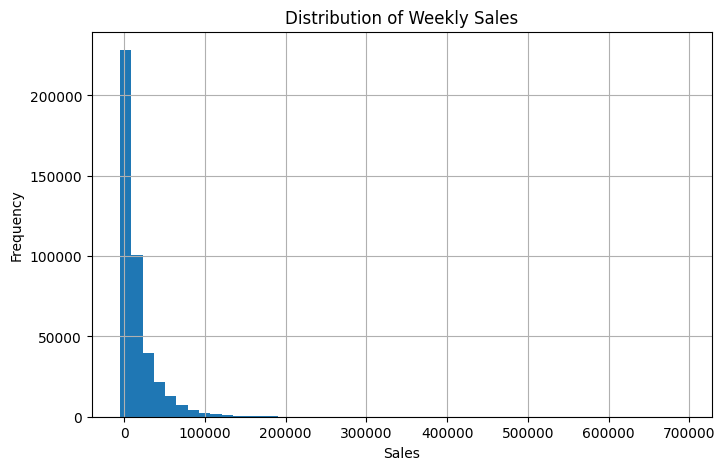

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
train['Weekly_Sales'].hist(bins=50)
plt.title("Distribution of Weekly Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()


Lets check holiday vs non holiday sales

In [ ]:
# Average sales during holiday vs non-holiday
holiday_sales = train.groupby('IsHoliday')['Weekly_Sales'].mean()
print(holiday_sales)


IsHoliday
False    15901.445069
True     17035.823187
Name: Weekly_Sales, dtype: float64


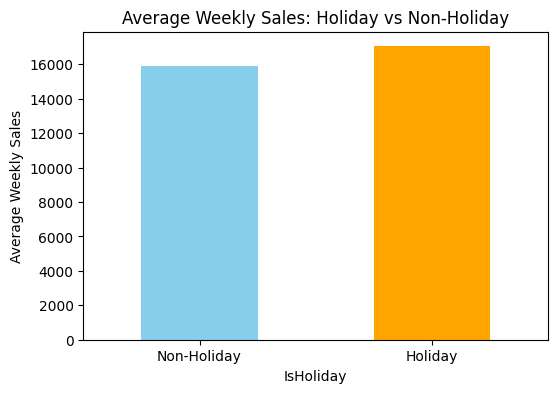

In [ ]:
import matplotlib.pyplot as plt

holiday_sales.plot(kind='bar', color=['skyblue', 'orange'], figsize=(6,4))
plt.title("Average Weekly Sales: Holiday vs Non-Holiday")
plt.ylabel("Average Weekly Sales")
plt.xticks([0,1], ["Non-Holiday", "Holiday"], rotation=0)
plt.show()


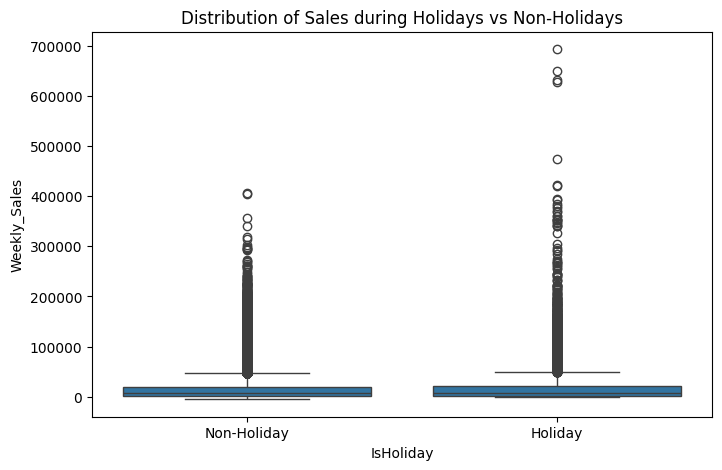

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=train)
plt.title("Distribution of Sales during Holidays vs Non-Holidays")
plt.xticks([0,1], ["Non-Holiday", "Holiday"])
plt.show()


Avg sales per store


Store
20    29508.301592
4     29161.210415
14    28784.851727
13    27355.136891
2     26898.070031
Name: Weekly_Sales, dtype: float64


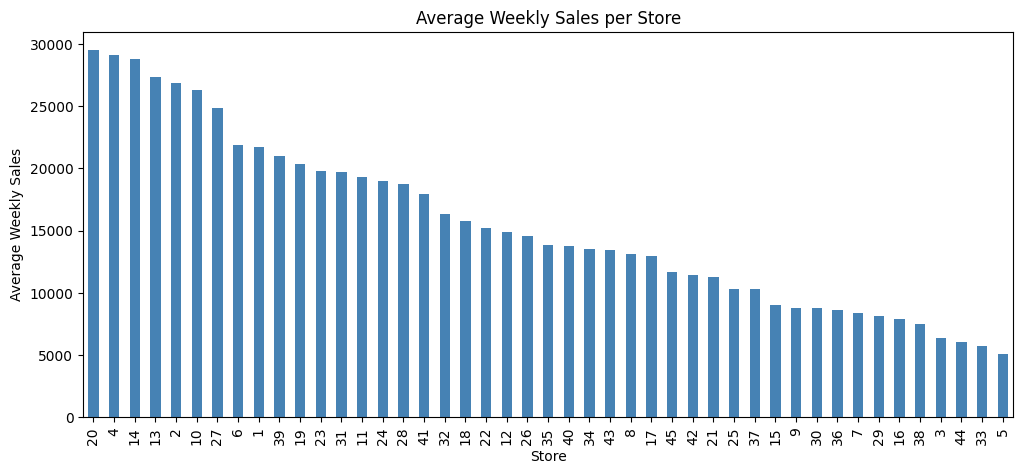

In [ ]:
store_sales = train.groupby("Store")["Weekly_Sales"].mean().sort_values(ascending=False)
print(store_sales.head())

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
store_sales.plot(kind="bar", color="steelblue")
plt.title("Average Weekly Sales per Store")
plt.xlabel("Store")
plt.ylabel("Average Weekly Sales")
plt.show()


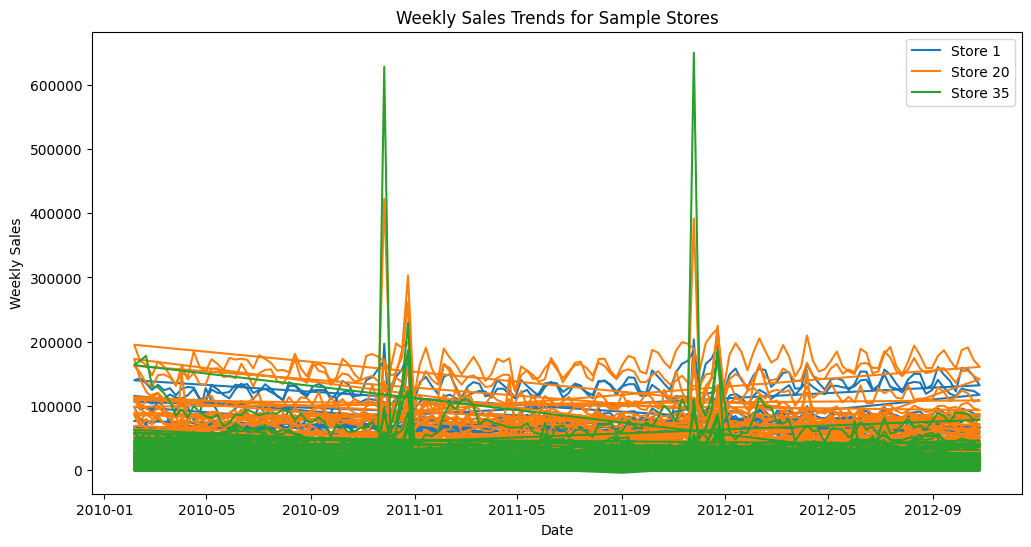

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,6))
sample_stores = [1, 20, 35]  # pick a few stores
for s in sample_stores:
    store_data = train[train["Store"] == s]
    plt.plot(store_data["Date"], store_data["Weekly_Sales"], label=f"Store {s}")

plt.legend()
plt.title("Weekly Sales Trends for Sample Stores")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.show()


Avg sales per department


Dept
92    75204.870531
95    69824.423080
38    61090.619568
72    50566.515417
65    45441.706224
Name: Weekly_Sales, dtype: float64


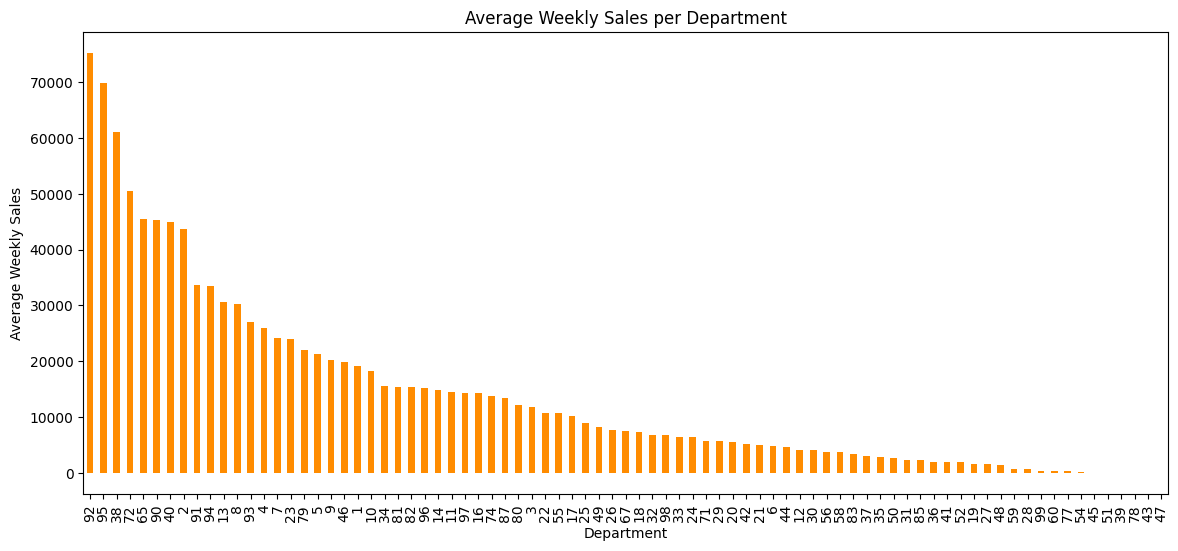

In [ ]:
dept_sales = train.groupby("Dept")["Weekly_Sales"].mean().sort_values(ascending=False)
print(dept_sales.head())

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
dept_sales.plot(kind="bar", color="darkorange")
plt.title("Average Weekly Sales per Department")
plt.xlabel("Department")
plt.ylabel("Average Weekly Sales")
plt.show()


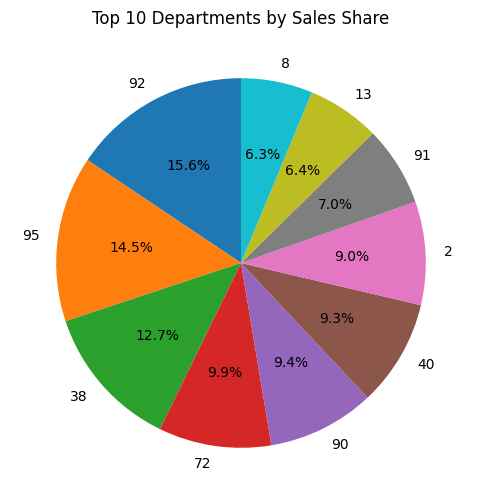

In [ ]:
dept_sales_total = train.groupby("Dept")["Weekly_Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
dept_sales_total.head(10).plot(kind="pie", autopct='%1.1f%%', startangle=90)
plt.ylabel("")
plt.title("Top 10 Departments by Sales Share")
plt.show()


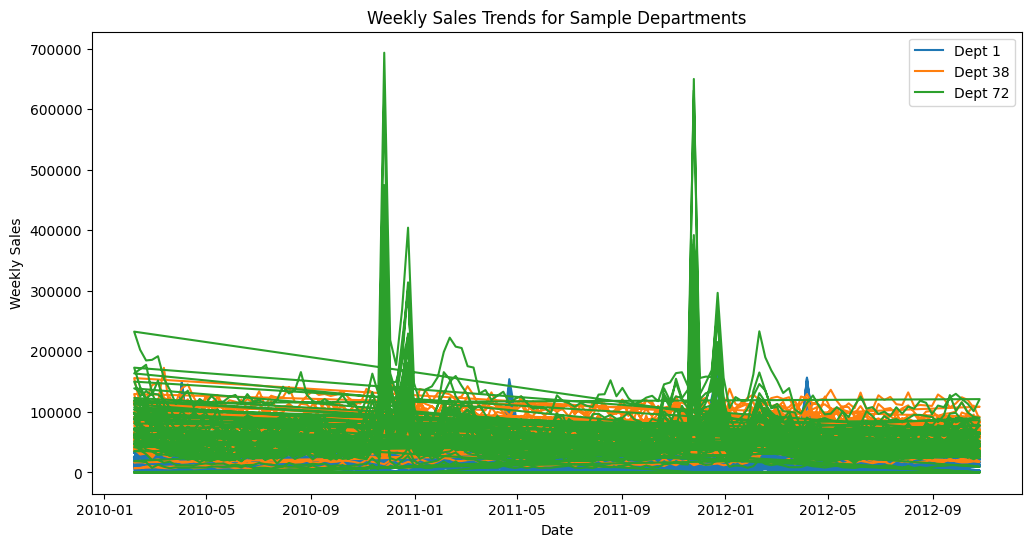

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,6))
sample_depts = [1, 38, 72]  # pick interesting departments
for d in sample_depts:
    dept_data = train[train["Dept"] == d]
    plt.plot(dept_data["Date"], dept_data["Weekly_Sales"], label=f"Dept {d}")

plt.legend()
plt.title("Weekly Sales Trends for Sample Departments")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.show()


Lets analyze Stores dataset now


In [ ]:
print(stores.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
None


Lets merge train and store to analyze sales by type and  stores

In [ ]:
train_store = train.merge(stores, on="Store", how="left") 
print(train_store.head())

   Store  Dept       Date  Weekly_Sales  IsHoliday Type    Size
0      1     1 2010-02-05      24924.50      False    A  151315
1      1     1 2010-02-12      46039.49       True    A  151315
2      1     1 2010-02-19      41595.55      False    A  151315
3      1     1 2010-02-26      19403.54      False    A  151315
4      1     1 2010-03-05      21827.90      False    A  151315


Average sales by store type

Type
A    20099.568043
B    12237.075977
C     9519.532538
Name: Weekly_Sales, dtype: float64


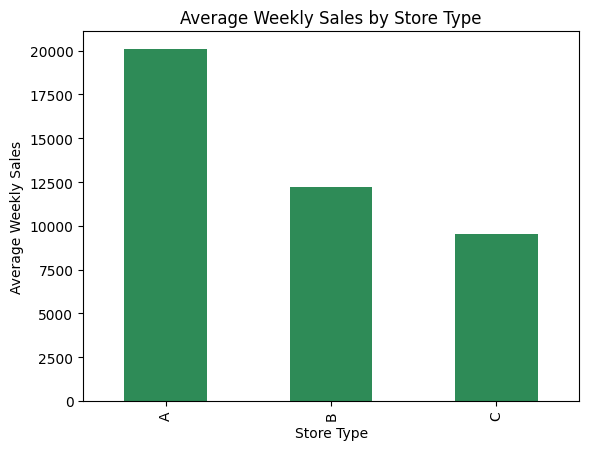

In [ ]:
type_sales = train_store.groupby("Type")["Weekly_Sales"].mean().sort_values(ascending=False)
print(type_sales)
type_sales.plot(kind="bar", color="seagreen") 
plt.title("Average Weekly Sales by Store Type") 
plt.xlabel("Store Type") 
plt.ylabel("Average Weekly Sales") 
plt.show()

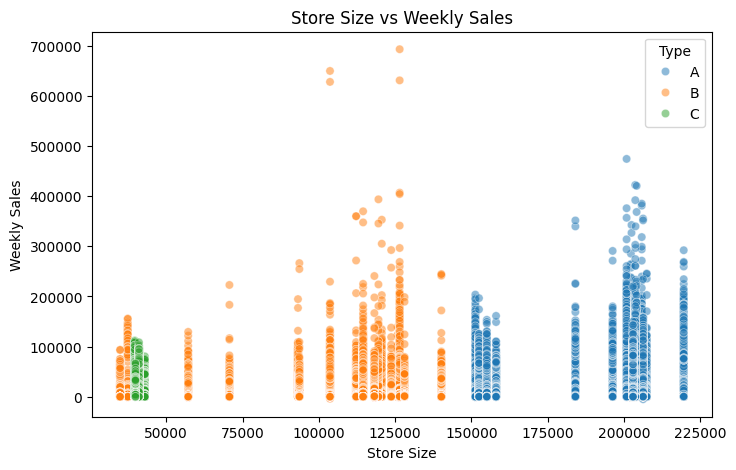

In [ ]:
plt.figure(figsize=(8,5)) 
sns.scatterplot(x="Size", y="Weekly_Sales", data=train_store, hue="Type", alpha=0.5) 
plt.title("Store Size vs Weekly Sales") 
plt.xlabel("Store Size") 
plt.ylabel("Weekly Sales") 
plt.show()

Its turn to watch features dataset


In [ ]:
print(features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     8190 non-null   float64       
 5   MarkDown2     8190 non-null   float64       
 6   MarkDown3     8190 non-null   float64       
 7   MarkDown4     8190 non-null   float64       
 8   MarkDown5     8190 non-null   float64       
 9   CPI           8190 non-null   float64       
 10  Unemployment  8190 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB
None


Merge it with train_stores


In [ ]:
train_features = train_store.merge(features, on=["Store","Date"], how="left")
print(train_features.head())


   Store  Dept       Date  Weekly_Sales  IsHoliday_x Type    Size  \
0      1     1 2010-02-05      24924.50        False    A  151315   
1      1     1 2010-02-12      46039.49         True    A  151315   
2      1     1 2010-02-19      41595.55        False    A  151315   
3      1     1 2010-02-26      19403.54        False    A  151315   
4      1     1 2010-03-05      21827.90        False    A  151315   

   Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0        42.31       2.572        0.0        0.0        0.0        0.0   
1        38.51       2.548        0.0        0.0        0.0        0.0   
2        39.93       2.514        0.0        0.0        0.0        0.0   
3        46.63       2.561        0.0        0.0        0.0        0.0   
4        46.50       2.625        0.0        0.0        0.0        0.0   

   MarkDown5         CPI  Unemployment  IsHoliday_y  
0        0.0  211.096358         8.106        False  
1        0.0  211.242170        

temperature vs sales

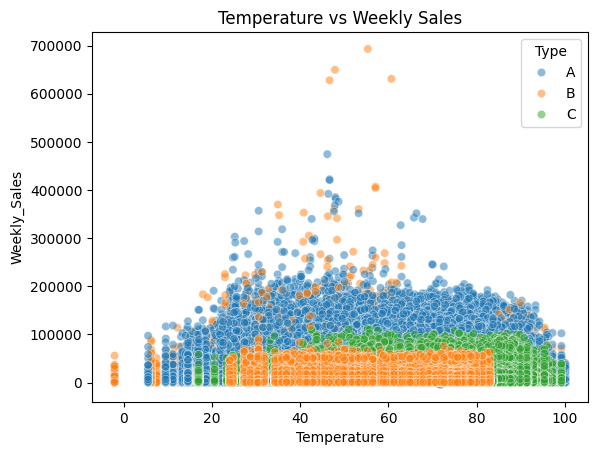

In [ ]:
sns.scatterplot(x="Temperature", y="Weekly_Sales", data=train_features, hue="Type", alpha=0.5)
plt.title("Temperature vs Weekly Sales")
plt.show()


Fuel price vs sales

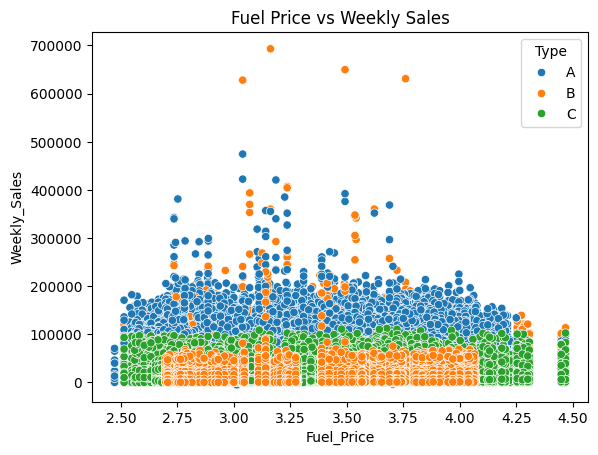

In [ ]:
sns.scatterplot(x="Fuel_Price", y="Weekly_Sales", data=train_features , hue="Type")
plt.title("Fuel Price vs Weekly Sales")
plt.show()


CPI and unemployemnet vs sales

<Axes: xlabel='CPI', ylabel='Weekly_Sales'>

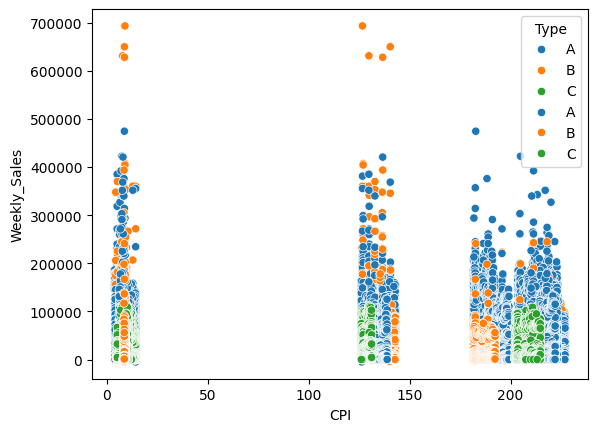

In [ ]:
sns.scatterplot(x="CPI", y="Weekly_Sales", data=train_features, hue="Type")
sns.scatterplot(x="Unemployment", y="Weekly_Sales", data=train_features ,hue="Type")


Total markdown by type

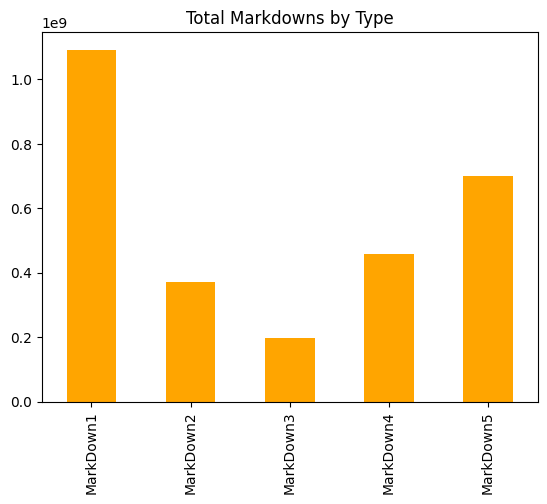

In [ ]:
markdown_cols = ["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]
train_features[markdown_cols].sum().plot(kind="bar", color="orange")
plt.title("Total Markdowns by Type")
plt.show()


Correlation analysis

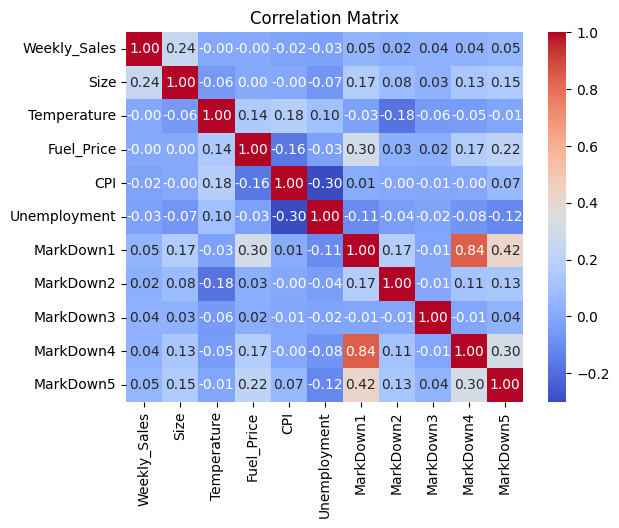

In [ ]:
numeric_cols = ["Weekly_Sales","Size","Temperature","Fuel_Price","CPI","Unemployment"] + markdown_cols
corr = train_features[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


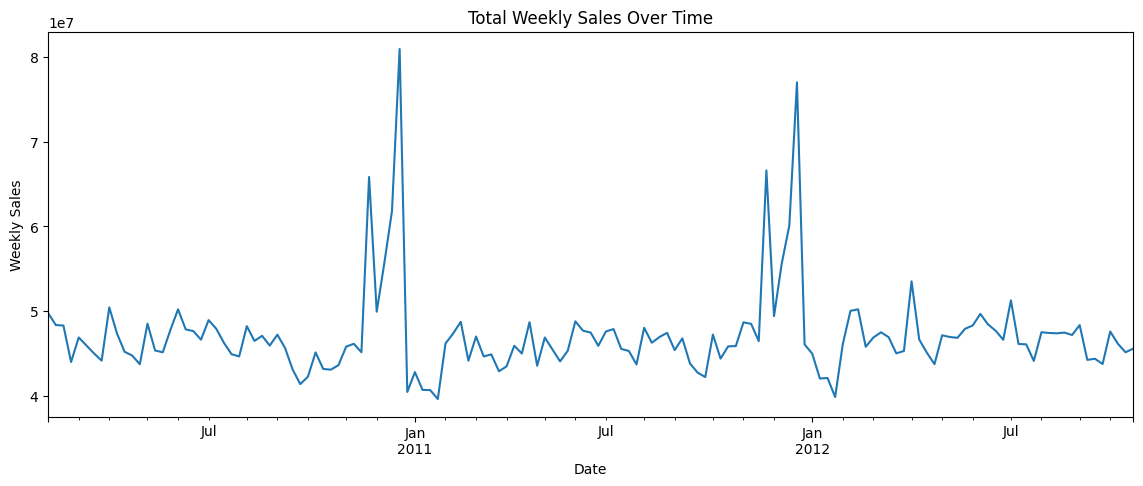

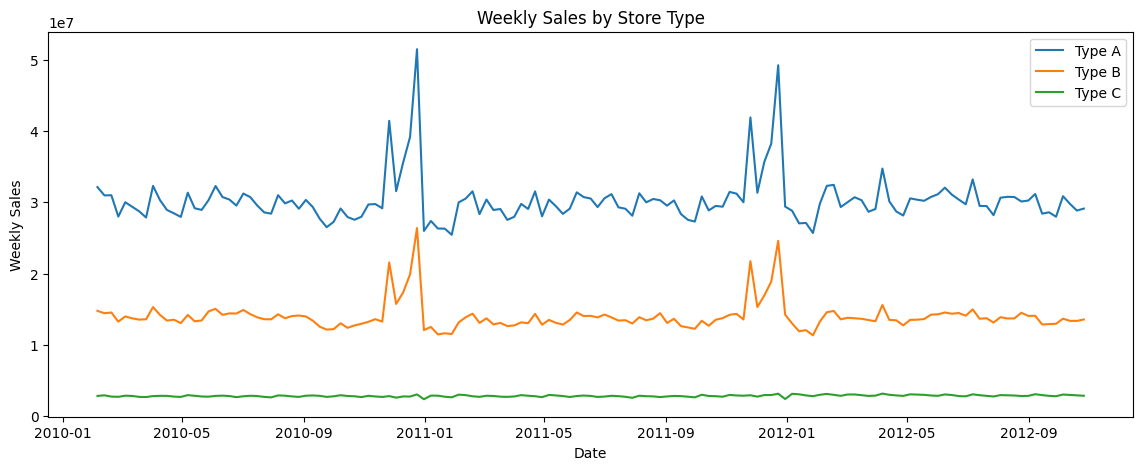

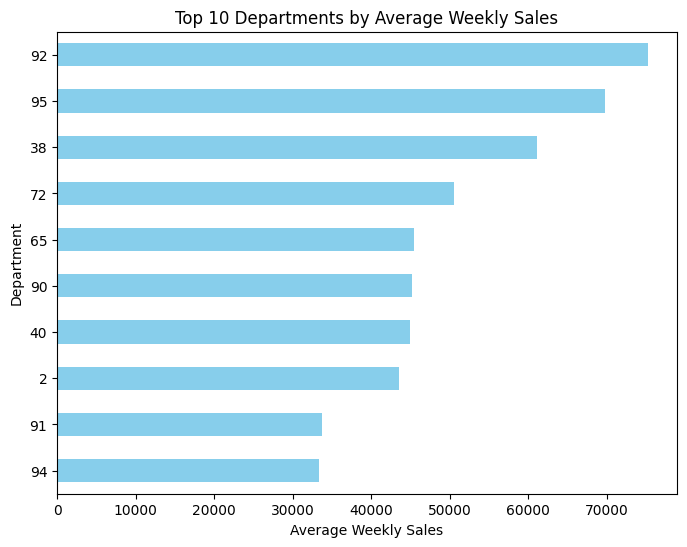

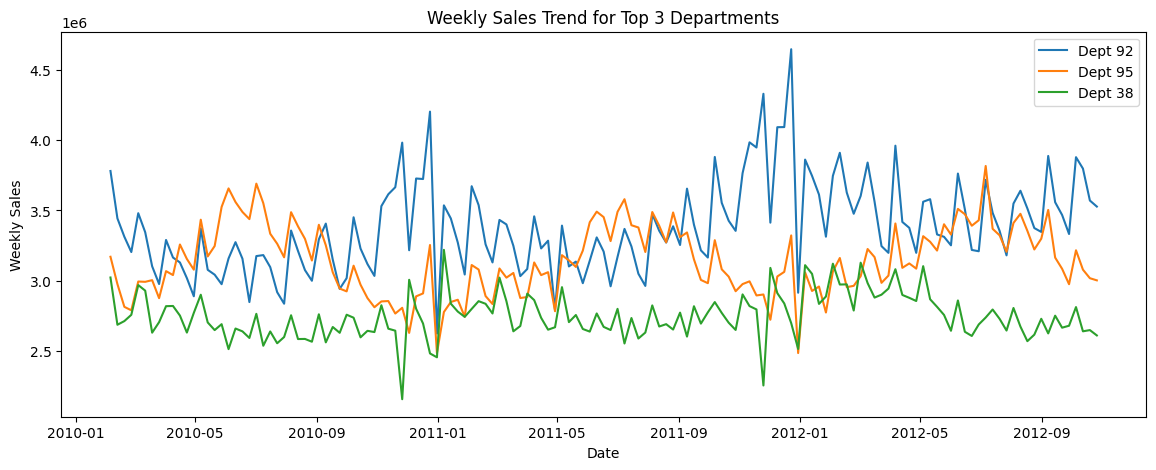

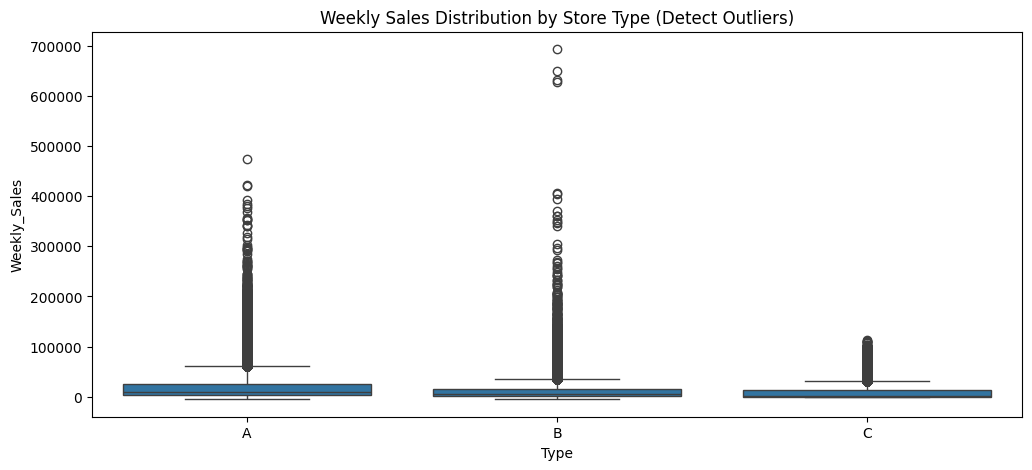

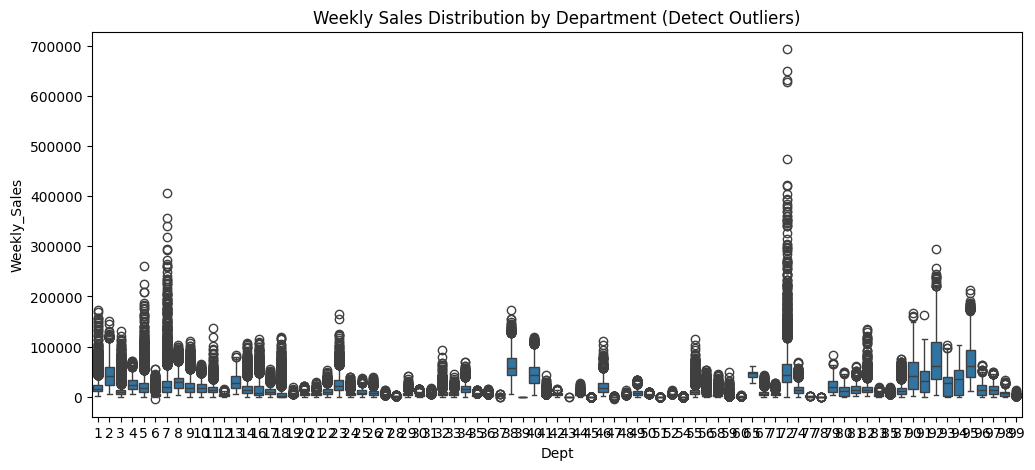

In [ ]:
# -----------------------------
# 1️⃣ Total Weekly Sales Over Time
# -----------------------------
weekly_sales = train_features.groupby("Date")["Weekly_Sales"].sum()
plt.figure(figsize=(14,5))
weekly_sales.plot()
plt.title("Total Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.show()

# -----------------------------
# 2️⃣ Weekly Sales by Store Type Over Time
# -----------------------------
plt.figure(figsize=(14,5))
for store_type in train_features['Type'].unique():
    temp = train_features[train_features['Type']==store_type].groupby("Date")["Weekly_Sales"].sum()
    plt.plot(temp, label=f"Type {store_type}")
plt.title("Weekly Sales by Store Type")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()


# -----------------------------
# 4️⃣ Department-Level Analysis
# -----------------------------
# Top 10 departments by average weekly sales
dept_sales = train_features.groupby("Dept")["Weekly_Sales"].mean().sort_values(ascending=False)
plt.figure(figsize=(8,6))
dept_sales.head(10).plot(kind="barh", color="skyblue")
plt.title("Top 10 Departments by Average Weekly Sales")
plt.xlabel("Average Weekly Sales")
plt.ylabel("Department")
plt.gca().invert_yaxis()
plt.show()

# Department sales trend over time (example for top 3 departments)
top_depts = dept_sales.head(3).index.tolist()
plt.figure(figsize=(14,5))
for dept in top_depts:
    temp = train_features[train_features['Dept']==dept].groupby("Date")["Weekly_Sales"].sum()
    plt.plot(temp, label=f"Dept {dept}")
plt.title("Weekly Sales Trend for Top 3 Departments")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()

# -----------------------------
# 5️⃣ Detect Outliers / Spikes
# -----------------------------
plt.figure(figsize=(12,5))
sns.boxplot(x="Type", y="Weekly_Sales", data=train_features)
plt.title("Weekly Sales Distribution by Store Type (Detect Outliers)")
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(x="Dept", y="Weekly_Sales", data=train_features)
plt.title("Weekly Sales Distribution by Department (Detect Outliers)")
plt.show()



In [ ]:
train_features["Year"] = train_features["Date"].dt.year
train_features["Month"] = train_features["Date"].dt.month
train_features["Week"] = train_features["Date"].dt.isocalendar().week
train_features["DayOfWeek"] = train_features["Date"].dt.dayofweek


In [ ]:
print(train_features.head())

   Store  Dept       Date  Weekly_Sales  IsHoliday_x Type    Size  \
0      1     1 2010-02-05      24924.50        False    A  151315   
1      1     1 2010-02-12      46039.49         True    A  151315   
2      1     1 2010-02-19      41595.55        False    A  151315   
3      1     1 2010-02-26      19403.54        False    A  151315   
4      1     1 2010-03-05      21827.90        False    A  151315   

   Temperature  Fuel_Price  MarkDown1  ...  MarkDown3  MarkDown4  MarkDown5  \
0        42.31       2.572        0.0  ...        0.0        0.0        0.0   
1        38.51       2.548        0.0  ...        0.0        0.0        0.0   
2        39.93       2.514        0.0  ...        0.0        0.0        0.0   
3        46.63       2.561        0.0  ...        0.0        0.0        0.0   
4        46.50       2.625        0.0  ...        0.0        0.0        0.0   

          CPI  Unemployment  IsHoliday_y  Year  Month  Week  DayOfWeek  
0  211.096358         8.106        Fa

In [ ]:
# Merge IsHoliday columns into one
train_features["IsHoliday"] = train_features["IsHoliday_x"] | train_features["IsHoliday_y"]

# Drop the old duplicate columns
train_features.drop(["IsHoliday_x", "IsHoliday_y"], axis=1, inplace=True)

# Quick check
print(train_features.head())



   Store  Dept       Date  Weekly_Sales Type    Size  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50    A  151315        42.31       2.572   
1      1     1 2010-02-12      46039.49    A  151315        38.51       2.548   
2      1     1 2010-02-19      41595.55    A  151315        39.93       2.514   
3      1     1 2010-02-26      19403.54    A  151315        46.63       2.561   
4      1     1 2010-03-05      21827.90    A  151315        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        0.0        0.0        0.0        0.0        0.0  211.096358   
1        0.0        0.0        0.0        0.0        0.0  211.242170   
2        0.0        0.0        0.0        0.0        0.0  211.289143   
3        0.0        0.0        0.0        0.0        0.0  211.319643   
4        0.0        0.0        0.0        0.0        0.0  211.350143   

   Unemployment  Year  Month  Week  DayOfWeek  IsHoliday  
0         8.106  2010

In [ ]:
train_features["Lag_1"] = train_features.groupby(["Store","Dept"])["Weekly_Sales"].shift(1)
train_features["Lag_2"] = train_features.groupby(["Store","Dept"])["Weekly_Sales"].shift(2)

train_features["Rolling_4w"] = train_features.groupby(["Store","Dept"])["Weekly_Sales"].shift(1).rolling(window=4).mean()

train_features["Total_MarkDown"] = (
    train_features["MarkDown1"] + train_features["MarkDown2"] +
    train_features["MarkDown3"] + train_features["MarkDown4"] +
    train_features["MarkDown5"]
)


In [ ]:
print(train_features.head())

   Store  Dept       Date  Weekly_Sales Type    Size  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50    A  151315        42.31       2.572   
1      1     1 2010-02-12      46039.49    A  151315        38.51       2.548   
2      1     1 2010-02-19      41595.55    A  151315        39.93       2.514   
3      1     1 2010-02-26      19403.54    A  151315        46.63       2.561   
4      1     1 2010-03-05      21827.90    A  151315        46.50       2.625   

   MarkDown1  MarkDown2  ...  Unemployment  Year  Month  Week  DayOfWeek  \
0        0.0        0.0  ...         8.106  2010      2     5          4   
1        0.0        0.0  ...         8.106  2010      2     6          4   
2        0.0        0.0  ...         8.106  2010      2     7          4   
3        0.0        0.0  ...         8.106  2010      2     8          4   
4        0.0        0.0  ...         8.106  2010      3     9          4   

   IsHoliday     Lag_1     Lag_2  Rolling_4w  Total_Mark

In [ ]:
train_features['IsMonthStart'] = train_features['Date'].dt.is_month_start.astype(int)
train_features['IsMonthEnd'] = train_features['Date'].dt.is_month_end.astype(int)

train_features['Lag_4'] = train_features.groupby(['Store','Dept'])['Weekly_Sales'].shift(4)

In [ ]:
train_features['Lag_4'] = train_features.groupby(['Store','Dept'])['Weekly_Sales'].shift(4)

In [ ]:
train_features['Rolling_4w'] = (
    train_features.groupby(['Store','Dept'])['Weekly_Sales']
    .shift(1)  # exclude current week
    .rolling(window=4, min_periods=1)
    .mean()
)

# Example interactions
train_features['Size_x_Holiday'] = train_features['Size'] * train_features['IsHoliday']
train_features['Fuel_x_CPI'] = train_features['Fuel_Price'] * train_features['CPI']


markdown_cols = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
# Fill NaNs if not done
train_features[markdown_cols] = train_features[markdown_cols].fillna(0)

train_features['Total_MarkDown'] = train_features[markdown_cols].sum(axis=1)


In [ ]:
print(train_features.head(
    
))

   Store  Dept       Date  Weekly_Sales Type    Size  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50    A  151315        42.31       2.572   
1      1     1 2010-02-12      46039.49    A  151315        38.51       2.548   
2      1     1 2010-02-19      41595.55    A  151315        39.93       2.514   
3      1     1 2010-02-26      19403.54    A  151315        46.63       2.561   
4      1     1 2010-03-05      21827.90    A  151315        46.50       2.625   

   MarkDown1  MarkDown2  ...  IsHoliday     Lag_1     Lag_2    Rolling_4w  \
0        0.0        0.0  ...      False       NaN       NaN           NaN   
1        0.0        0.0  ...       True  24924.50       NaN  24924.500000   
2        0.0        0.0  ...      False  46039.49  24924.50  35481.995000   
3        0.0        0.0  ...      False  41595.55  46039.49  37519.846667   
4        0.0        0.0  ...      False  19403.54  41595.55  32990.770000   

   Total_MarkDown  IsMonthStart  IsMonthEnd    Lag

In [ ]:
lag_rolling_cols = ['Lag_1','Lag_2','Lag_4','Rolling_4w']
train_features[lag_rolling_cols] = train_features[lag_rolling_cols].fillna(0)


In [ ]:
print(train_features.head())

   Store  Dept       Date  Weekly_Sales Type    Size  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50    A  151315        42.31       2.572   
1      1     1 2010-02-12      46039.49    A  151315        38.51       2.548   
2      1     1 2010-02-19      41595.55    A  151315        39.93       2.514   
3      1     1 2010-02-26      19403.54    A  151315        46.63       2.561   
4      1     1 2010-03-05      21827.90    A  151315        46.50       2.625   

   MarkDown1  MarkDown2  ...  IsHoliday     Lag_1     Lag_2    Rolling_4w  \
0        0.0        0.0  ...      False      0.00      0.00      0.000000   
1        0.0        0.0  ...       True  24924.50      0.00  24924.500000   
2        0.0        0.0  ...      False  46039.49  24924.50  35481.995000   
3        0.0        0.0  ...      False  41595.55  46039.49  37519.846667   
4        0.0        0.0  ...      False  19403.54  41595.55  32990.770000   

   Total_MarkDown  IsMonthStart  IsMonthEnd    Lag

In [ ]:
# Convert Type column to numeric labels
type_mapping = {'A': 0, 'B': 1, 'C': 2}
train_features['Type'] = train_features['Type'].map(type_mapping)


In [ ]:
print(train_features.head(
    
))

   Store  Dept       Date  Weekly_Sales  Type    Size  Temperature  \
0      1     1 2010-02-05      24924.50     0  151315        42.31   
1      1     1 2010-02-12      46039.49     0  151315        38.51   
2      1     1 2010-02-19      41595.55     0  151315        39.93   
3      1     1 2010-02-26      19403.54     0  151315        46.63   
4      1     1 2010-03-05      21827.90     0  151315        46.50   

   Fuel_Price  MarkDown1  MarkDown2  ...  IsHoliday     Lag_1     Lag_2  \
0       2.572        0.0        0.0  ...      False      0.00      0.00   
1       2.548        0.0        0.0  ...       True  24924.50      0.00   
2       2.514        0.0        0.0  ...      False  46039.49  24924.50   
3       2.561        0.0        0.0  ...      False  41595.55  46039.49   
4       2.625        0.0        0.0  ...      False  19403.54  41595.55   

     Rolling_4w  Total_MarkDown  IsMonthStart  IsMonthEnd    Lag_4  \
0      0.000000             0.0             0           0 

In [ ]:
columns_to_drop = [ 'MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
train_features.drop(columns=columns_to_drop, inplace=True)


In [ ]:
train_features = train_features.sort_values(by=['Store','Dept','Year','Week'])


In [ ]:
# If you have a specific cutoff date, e.g., 2012-06-01
cutoff_date = '2012-06-02'

train_data = train_features[train_features['Date'] < cutoff_date]
test_data = train_features[train_features['Date'] >= cutoff_date]

# Drop Date column if not needed
train_data = train_data.drop(columns=['Date'], errors='ignore')
test_data = test_data.drop(columns=['Date'], errors='ignore')


In [ ]:
print(train_data.shape)
print(test_data.shape)

(359432, 23)
(62138, 23)


In [ ]:
X_train = train_data.drop(columns=['Weekly_Sales'])
y_train = train_data['Weekly_Sales']

X_test = test_data.drop(columns=['Weekly_Sales'])
y_test = test_data['Weekly_Sales']


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
# Features and target
X_train = train_data.drop(columns=['Weekly_Sales'])
y_train = train_data['Weekly_Sales']

X_test = test_data.drop(columns=['Weekly_Sales'])
y_test = test_data['Weekly_Sales']


In [ ]:
# Initialize model
rf_model = RandomForestRegressor(
    n_estimators=100,    # number of trees
    max_depth=15,        # limit depth to avoid overfitting
    random_state=42,
    n_jobs=-1            # use all cores
)

# Fit model
rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
y_pred = rf_model.predict(X_test)


In [ ]:
# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R^2 Score: {r2:.4f}")


NameError: name 'mean_squared_error' is not defined